# Spatial data

We will play with three main spatial datasets to see how spatial data differs from normal numeric data.

Some learnings:
- osmnx module to download data from OpenStreetMap
- geopandas: load geojson file and load polygons or linestrings into a dataframe
- contextily: module to add a basemap to our plots

In [7]:
import geopandas
import osmnx
import contextily as cx
import matplotlib.pyplot as plt

In [8]:
cities = geopandas.read_file("https://ndownloader.figshare.com/files/20232174")

In [9]:
cities.head()

,city_id,n_buildings,geometry
0,ci000,2348,"POLYGON ((385390.071 4202949.446, 384488.697 4..."
1,ci001,2741,"POLYGON ((214893.033 4579137.558, 215258.185 4..."
2,ci002,5472,"POLYGON ((690674.281 4182188.538, 691047.526 4..."
3,ci003,14608,"POLYGON ((513378.282 4072327.639, 513408.853 4..."
4,ci004,2324,"POLYGON ((206989.081 4129478.031, 207275.702 4..."


Polygons of cities from Spain

<Axes: >

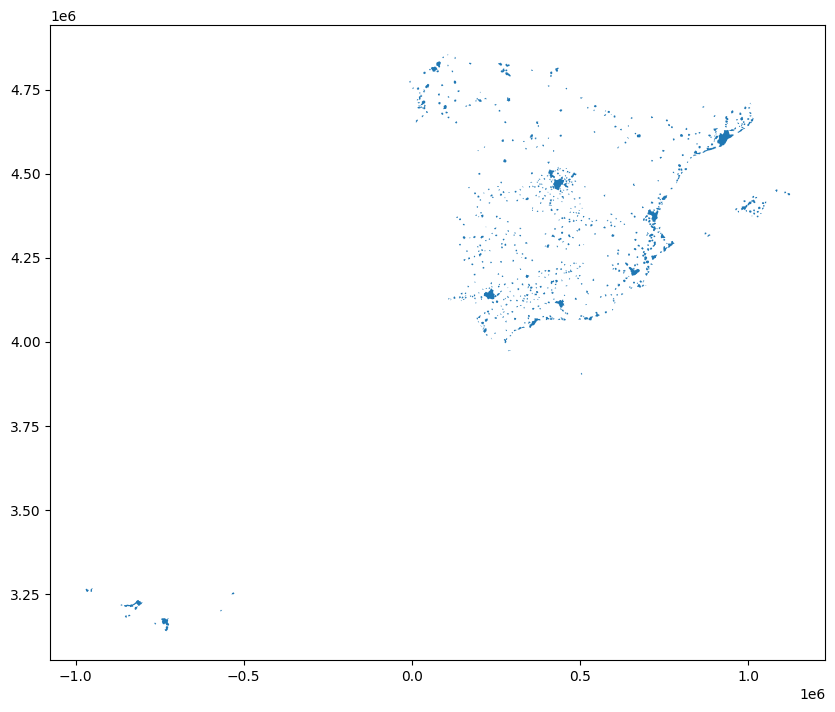

In [10]:
cities.plot(figsize=(10, 10))

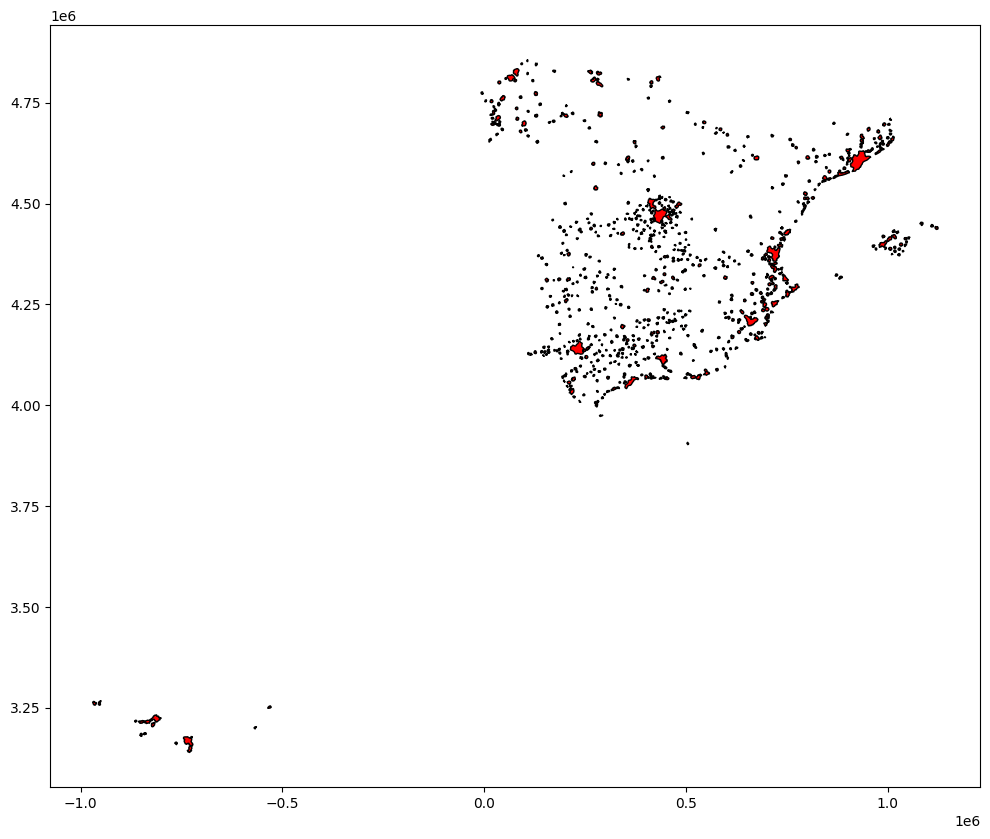

In [11]:
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
cities.plot(
    linewidth=1,
    facecolor='red',
    edgecolor='black',
    ax=ax
);

Plot just the polygon of one city

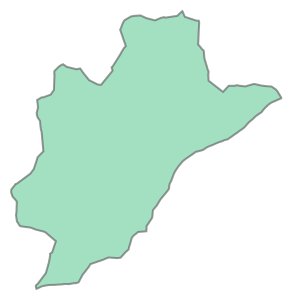

In [12]:
cities.loc[15, 'geometry']

Load geojson file of the street network of the city of Madrid

In [13]:
url = (
    "https://github.com/geochicasosm/lascallesdelasmujeres"
    "/raw/master/data/madrid/final_tile.geojson"
)
streets = geopandas.read_file(url)

<Axes: >

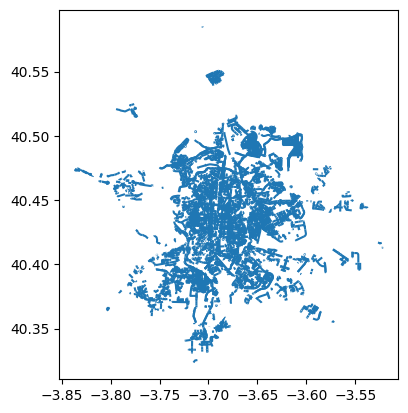

In [14]:
streets.plot()

Load the final dataset that is a set of points demarcating the location of bars in Madrid

In [15]:
pois = osmnx.geometries_from_place(
    "Madrid, Spain", tags={"amenity": "bar"}
)

/tmp/ipykernel_21200/1402187098.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = osmnx.geometries_from_place(


<Axes: >

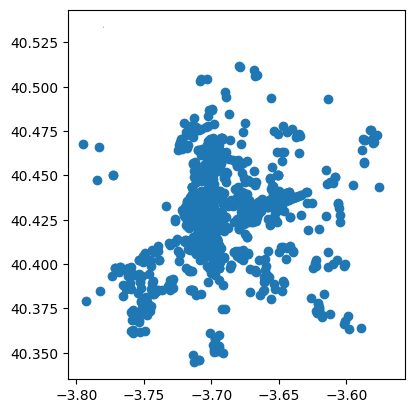

In [16]:
pois.plot()

# Transforming CRS Coordinate Reference System

In [17]:
cities.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

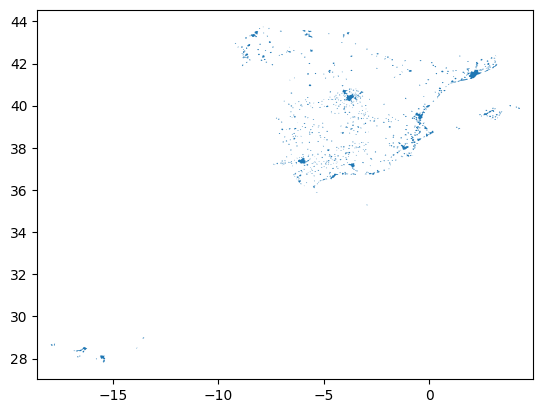

In [18]:
cities.to_crs(epsg=4326).plot()
lims = plt.axis('equal')

# Plot just one city

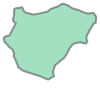

In [19]:
mad = cities.loc[[12], :].to_crs(epsg=4326)
mad.loc[12]['geometry']

<Axes: >

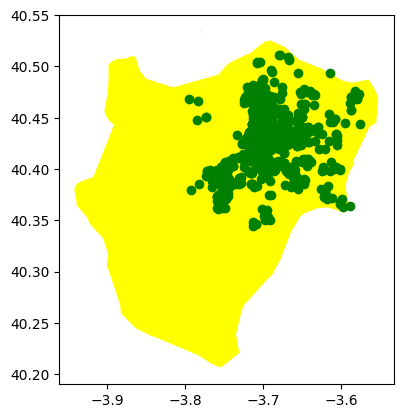

In [20]:
f, ax = plt.subplots(1)

mad.plot(ax=ax, color="yellow")

pois.plot(ax=ax, color="green")

In [21]:
pois_projected = pois.to_crs(cities.crs)
pois_projected.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Plot points of interest with a radio (buffer)

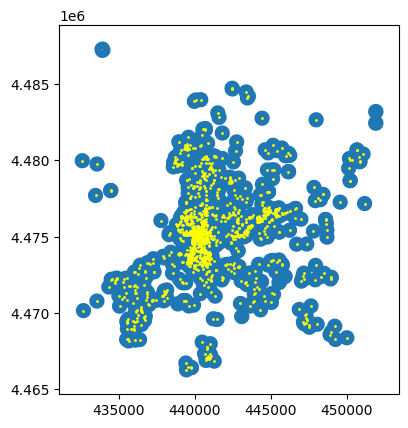

In [22]:
buf = pois_projected.buffer(500) # radio

f, ax = plt.subplots(1)
# Plot buffer
buf.plot(ax=ax, linewidth=0)
# Plot named places on top for reference
# [NOTE how we modify the dot size (`markersize`)
# and the color (`color`)]
pois_projected.plot(ax=ax, markersize=1, color='yellow');

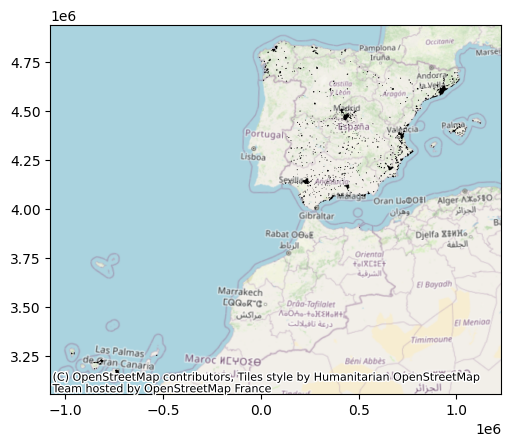

In [23]:
ax = cities.plot(color="black")
cx.add_basemap(ax, crs=cities.crs);

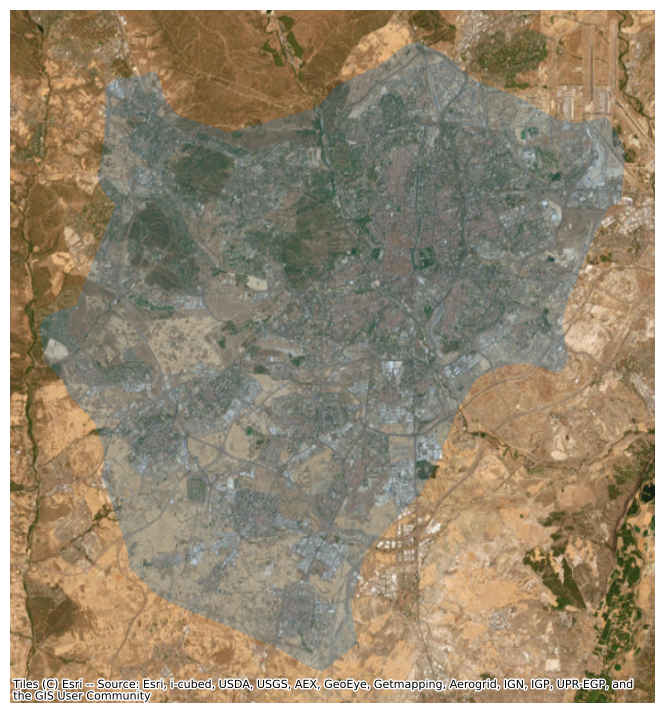

In [24]:
f, ax = plt.subplots(1, figsize=(9, 9))
mad.plot(alpha=0.25, ax=ax)
cx.add_basemap(ax,
               crs=mad.crs,
               source=cx.providers.Esri.WorldImagery
              )
ax.set_axis_off()

# Task I
Plot pubs in the center of Liverpool

In [27]:
import geopandas, osmnx
import os
import contextily as cx

In [28]:
liv = geopandas.read_file('data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp')

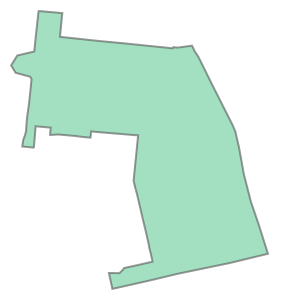

In [29]:
liv.loc[0]['geometry']

In [30]:
bikepaths = osmnx.graph_from_place('Liverpool, UK', network_type='bike')

In [31]:
len(bikepaths)

27183

In [32]:
pubs = osmnx.features_from_place(
    "Liverpool, UK", tags={"amenity": "bar"}
)

In [33]:
len(pubs)

142

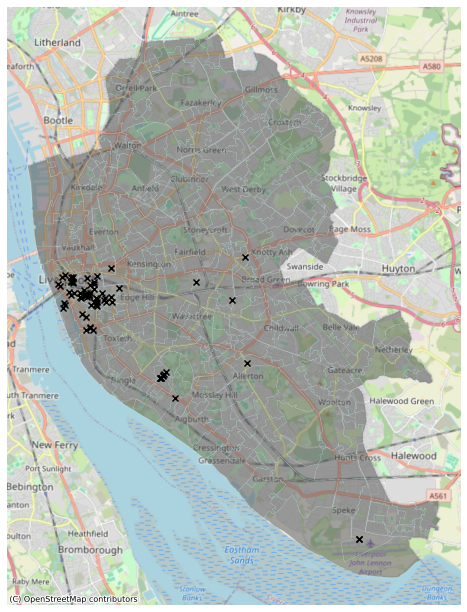

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 11))
ax.axis('off')
liv.plot(ax=ax, color='#525252', alpha=0.5, linewidth=0.3, edgecolor='#B9EBE3')

pubs_crs = pubs.to_crs(liv.crs)
pubs_crs.plot(ax=ax, color='black', marker='x')
cx.add_basemap(ax,
               crs=liv.crs,
               source=cx.providers.OpenStreetMap.Mapnik
              )

## Task II: Plot the ten smallest areas in the city in another color

In [34]:
liv['area'] = liv['geometry'].area

liv = liv.sort_values('area', ascending=True)

smallest = liv[0:10]
rest = liv[10:]

len(liv), len(smallest), len(rest)

(298, 10, 288)

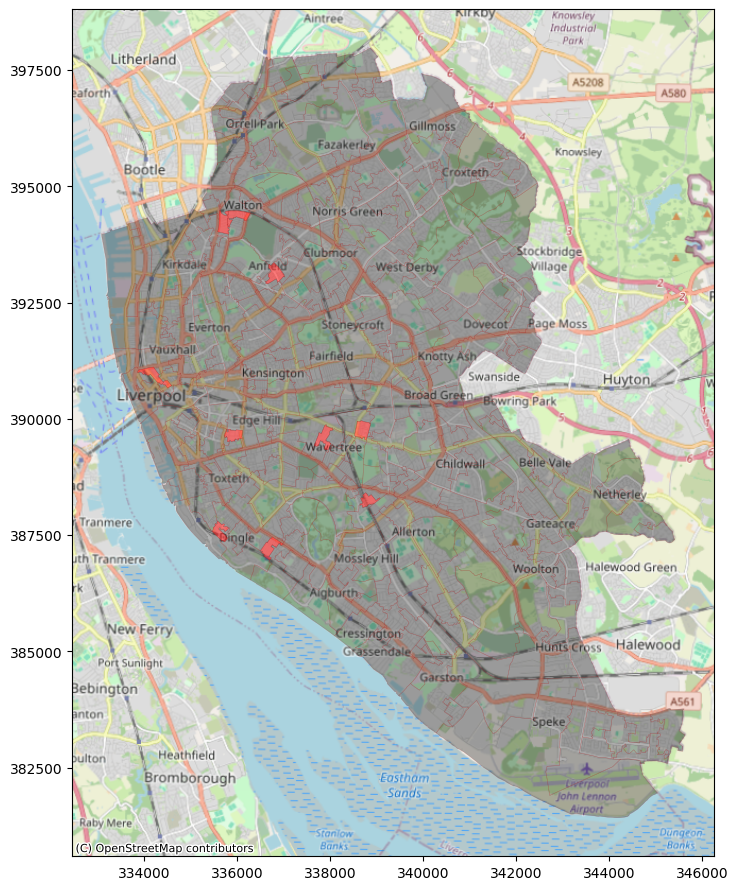

In [35]:
f, ax = plt.subplots(1, figsize=(10, 11))

smallest.plot(ax=ax, color='red', alpha=0.5, linewidth=0.3, edgecolor='#B22222')
rest.plot(ax=ax, color='black', alpha=0.3, linewidth=0.3, edgecolor='#B22222')
cx.add_basemap(ax,
               crs=liv.crs,
               source=cx.providers.OpenStreetMap.Mapnik
              )

## Task III: The gender gap on the streets

Which group accounts for longer total street length in Zaragoza: men or women? By how much?

In [36]:
url = (
    "https://github.com/geochicasosm/lascallesdelasmujeres"
    "/raw/master/data/madrid/final_tile.geojson"
)
streets = geopandas.read_file(url)

In [37]:
streets_newcrs = streets.to_crs(epsg=25830)
streets_newcrs.iloc[3]['geometry'].length

152.44289535581171

In [38]:
streets_newcrs.head()

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
0,Plaza Virgen de la Capilla,123483746,,Female,,-,-,"POLYGON ((439422.733 4481558.003, 439432.726 4..."
1,Plaza Nuestra Señora del Prado,123483930,,Female,,-,-,"POLYGON ((439481.147 4481580.631, 439490.438 4..."
2,Avenida del Cardenal Herrera Oria,4272448,,Male,,None,None,"LINESTRING (439467.114 4481620.796, 439478.932..."
3,Glorieta de Mariano Salvador Maella,4292687,,Male,,None,None,"LINESTRING (439260.809 4481179.913, 439256.296..."
4,Calle de Pedro Rico,4292689,,Male,,None,None,"LINESTRING (440277.812 4481458.946, 440296.262..."


In [41]:
female = streets_newcrs[streets_newcrs['gender'] == 'Female']
male = streets_newcrs[streets_newcrs['gender'] == 'Male']

print(f'{len(female)} streets with female name')
print(f'{len(male)} streets with male name')

1993 streets with female name
8387 streets with male name


In [42]:
female_length = sum(female['geometry'].length)
male_length = sum(male['geometry'].length)


diff = male_length - female_length

print(f'Difference between female and male: {diff/1000} kms')

Difference between female and male: 907.8732602476949 kms
